## Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.

Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
## Load Data
# The first two columns contains the X values and the third column
# contains the label (y).

data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:,:2]
y = data[:, 2]
y = np.reshape(y, (-1, 1))

In [3]:
def plotData(X, y):
    """
    PLOTDATA Plots the data points X and y into a new figure 
    PLOTDATA(x,y) plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix.
    """
    
    pos = X[np.isin(y, [1]).ravel()]
    neg = X[np.isin(y, [0]).ravel()]
    fig, ax = plt.subplots()
    plt.scatter(pos[:, 0], pos[:, 1], c='black', marker='+', linewidths=2, label='y = 1')
    plt.scatter(neg[:, 0], neg[:, 1], c='yellow', marker='o', linewidths=2, label='y = 0')

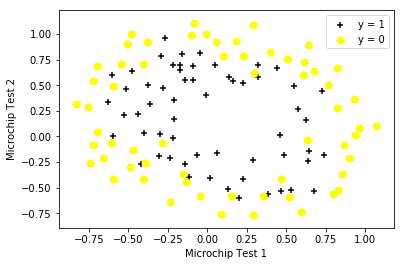

In [4]:
plotData(X, y)

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(loc='upper right')

=========== Part 1: Regularized Logistic Regression ============

In this part, you are given a dataset with data points that are not
linearly separable. However, you would still like to use logistic
regression to classify the data points.

To do so, you introduce more features to use -- in particular, you add
polynomial features to our data matrix (similar to polynomial
regression).

In [5]:
def mapFeature(X1, X2):
    """
    MAPFEATURE Feature mapping function to polynomial features
    
    MAPFEATURE(X1, X2) maps the two input features
    to quadratic features used in the regularization exercise.
    
    Returns a new feature array with more features, comprising of 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    
    Inputs X1, X2 must be the same size
    """
    
    degree = 6
    out = np.ones( (X1.shape[0], 1) )
    current_col = 1
    
    for i in range(1, degree + 1):
        for j in range(i+1):
            out = np.insert( out, current_col, np.power(X1,i-j) * np.power(X2,j), axis=1 )
            current_col += 1
            
    return out

In [6]:
# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X[:,0], X[:,1])

# Initialize fitting parameters
initial_theta = np.zeros( (X.shape[1], 1) )

# Set regularization parameter lambda to 1
lambd = 1

In [7]:
def sigmoid(z):
    """
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    """
    
    return 1 / (1 + np.exp(-z))

In [8]:
def costFunctionReg(theta, X, y, lambd):
    """
    COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters.
    """
    
    m = len(X) # number of training examples
    
    first = np.dot( -y.T, np.log( sigmoid(np.dot(X, theta)) ) )
    second = np.dot( -(1-y).T, np.log (1 - sigmoid(np.dot(X, theta)) ) )
    J = (1/m) * np.sum(first + second) + lambd/(2*m) * np.dot(theta[1:].T, theta[1:]).item()
    
    grad = (1/m) * np.dot( X.T, (sigmoid(np.dot(X, theta)) - y) ) + lambd/m * theta
    grad[0] = (1/m) * np.dot(X[:,0].T, (sigmoid( np.dot(X, theta) ) - y))
    grad = grad.ravel()
    
    return J, grad

In [9]:
# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X, y, lambd)

print('Cost at initial theta (zeros): ', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
print(*grad[0:5], sep='\n')
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

Cost at initial theta (zeros):  0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
0.00847457627118644
0.01878809322033899
7.777118644068388e-05
0.05034463953635592
0.011501330787338986
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [10]:
# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1], 1))
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('\nCost at test theta (with lambda = 10): ', cost)
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
print(*grad[0:5], sep='\n')
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922')


Cost at test theta (with lambda = 10):  3.16450933161501
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
0.34604507367924525
0.16135191928091164
0.19479575561199702
0.22686278222504966
0.0921856751032918
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


============= Part 2: Regularization and Accuracies =============

Optional Exercise:
In this part, you will get to try different values of lambda and
see how regularization affects the decision coundart

Try the following values of lambda (0, 1, 10, 100).

How does the decision boundary change when you vary lambda? How does
the training set accuracy vary?

In [11]:
# Initialize fitting parameters
initial_theta = np.zeros( (X.shape[1], 1) )

# Set regularization parameter lambda to 1 (you should vary this)
lambd = 1

import scipy.optimize as opt
# Optimize
result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta.ravel(), args=(X, y.ravel(), lambd))  

theta = result[0].reshape((-1,1))
J, _ = costFunctionReg(theta, X, y, lambd)

In [12]:
def plotDecisionBoundary(theta, X, y):
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
    positive examples and o for the negative examples. X is assumed to be a either 
    1) Mx3 matrix, where the first column is an all-ones column for the 
       intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    
    plotData(X[:, 1:], y)
    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([X[:,1].min()-2,  X[:,1].max()+2], ndmin=2).T
        
        # Calculate the decision boundary line
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
        
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros(( len(u), len(v) ))
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])),theta)
        z = np.transpose(z) # important to transpose z before calling contour

        # Plot z = 0
        # Notice you need to specify the level 0
        # we get collections[0] so that we can display a legend properly
        contourObject = plt.contour(u, v, z, levels=[0], colors = 'green')
        plt.clabel(CS=contourObject, fmt = 'Decision boundary')

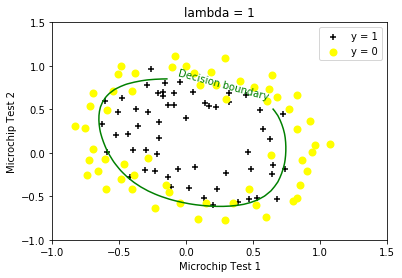

In [13]:
# Plot Boundary
plotDecisionBoundary(theta, X, y)
plt.title('lambda = {}'.format(lambd))

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(loc='upper right')

In [14]:
def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic 
    regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a 
    threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    
    p = sigmoid( np.dot(X, theta) )
    p = np.array(p)
    p[p >= 0.5] = 1
    p[p < 0.5] = 0
    return p

In [15]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: ', np.mean(p==y) * 100)
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

Train Accuracy:  83.05084745762711
Expected accuracy (with lambda = 1): 83.1 (approx)
